In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


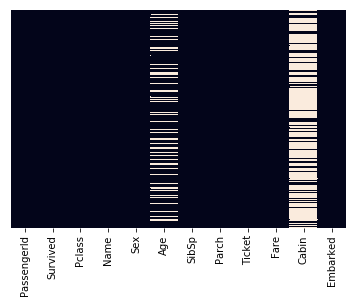

In [3]:
train.isnull()
sns.heatmap(train.isnull(),yticklabels = False,cbar = False)

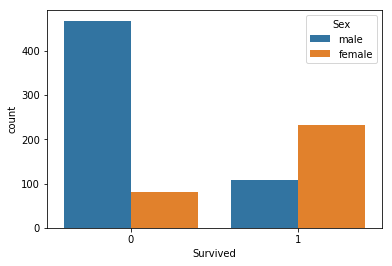

In [4]:
sns.countplot(x='Survived',hue='Sex',data=train)

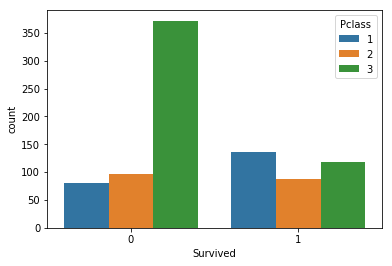

In [5]:
sns.countplot(x='Survived',hue='Pclass',data=train)

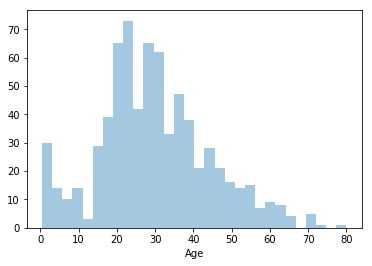

In [7]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

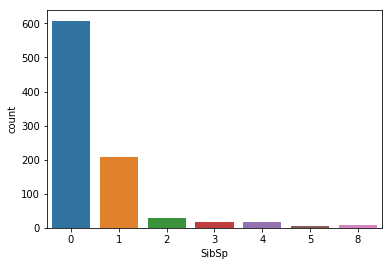

In [9]:
sns.countplot(train['SibSp'],data=train)

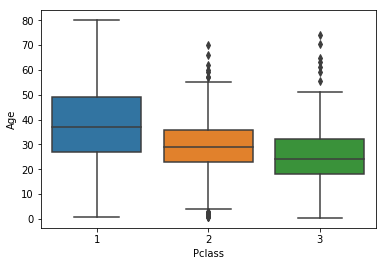

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


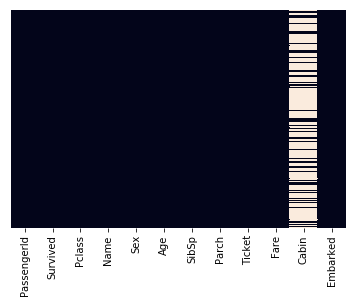

In [16]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False)

In [17]:
train.dropna(inplace=True)

In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C85,C
3,4,1,1,female,35.0,1,0,53.1000,C123,S
6,7,0,1,male,54.0,0,0,51.8625,E46,S
10,11,1,3,female,4.0,1,1,16.7000,G6,S
11,12,1,1,female,58.0,0,0,26.5500,C103,S


In [24]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,S,1,0,1
10,11,1,3,female,4.0,1,1,16.7000,G6,S,0,0,1
11,12,1,1,female,58.0,0,0,26.5500,C103,S,0,0,1


In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1
10,11,1,3,4.0,1,1,16.7000,G6,0,0,1
11,12,1,1,58.0,0,0,26.5500,C103,0,0,1


In [29]:
train.drop(['PassengerId'],axis = 1,inplace=True)

In [30]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,1,1,38.0,1,0,71.2833,C85,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1
6,0,1,54.0,0,0,51.8625,E46,1,0,1
10,1,3,4.0,1,1,16.7000,G6,0,0,1
11,1,1,58.0,0,0,26.5500,C103,0,0,1


In [31]:
train.drop(['Cabin'],axis = 1,inplace=True)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [43]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [35]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [38]:
y

1      1
3      1
6      0
10     1
11     1
21     1
23     1
27     0
31     1
52     1
54     0
55     1
62     0
66     1
75     0
88     1
92     0
96     0
97     1
102    0
110    0
118    0
123    1
124    0
128    1
136    1
137    0
139    0
148    0
151    1
      ..
748    0
751    1
759    1
763    1
765    1
772    0
776    0
779    1
781    1
782    0
789    0
796    1
802    1
806    0
809    1
815    0
820    1
823    1
835    1
839    1
849    1
853    1
857    1
862    1
867    0
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57        23
           1       0.77      0.84      0.80        44

   micro avg       0.73      0.73      0.73        67
   macro avg       0.70      0.68      0.69        67
weighted avg       0.72      0.73      0.72        67



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[12, 11],
       [ 7, 37]])